Imagine que uma empresa deseje prever quantas unidades de um produto serão
vendidas e qual o total monetário das vendas prevendo duas variáveis de saída com base nas mesmas variáveis de entrada.

https://scikit-learn.org/stable/modules/generated/sklearn.multioutput.MultiOutputRegressor.html

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn import metrics 
from sklearn.metrics import accuracy_score

In [2]:
dados = pd.read_csv(r"dados/dataset.csv")

In [3]:
dados.head(4)

,Ano,Periodo,Total_Vendas,Percentual_Aumento_Vendas_Ano_Anterior,Total_Unidades_Vendidas,Percentual_Aumento_Unidades_Ano_Anterior
0,2002,2002-03,19666.640,6.610000,3097,7.570000
1,2003,2003-04,20384.980,3.652581,3289,6.199548
2,2004,2004-05,20810.281,2.086345,3490,6.111280
3,2005,2005-06,21184.427,1.797890,3626,3.896848


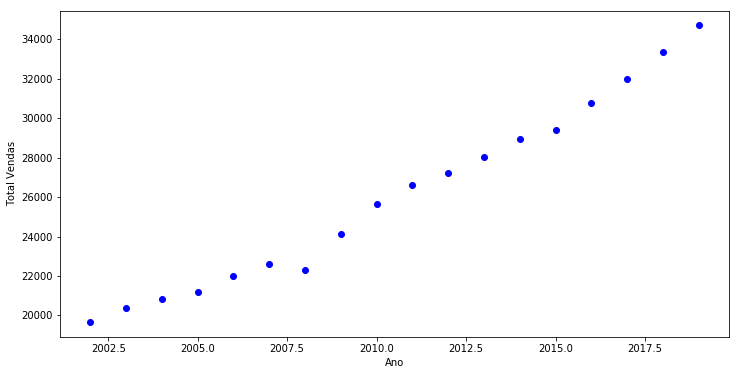

In [5]:
# Plota
plt.figure(figsize = (12, 6))
plt.scatter(dados['Ano'], dados['Total_Vendas'], c = 'blue')
plt.ylabel("Total Vendas")
plt.xlabel("Ano")
plt.show()

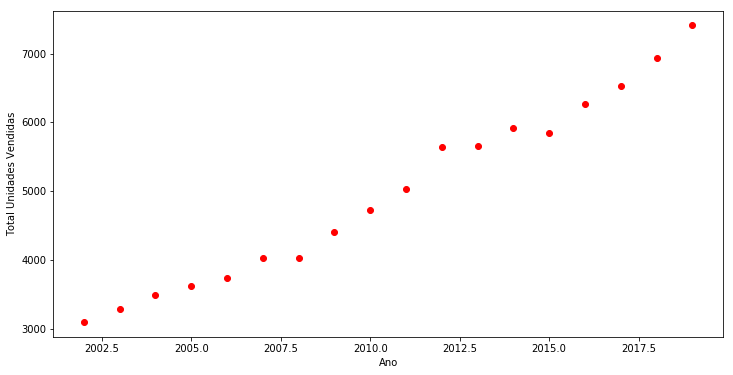

In [6]:
# Plota
plt.figure(figsize = (12, 6))
plt.scatter(dados['Ano'], dados['Total_Unidades_Vendidas'], c = 'red')
plt.ylabel("Total Unidades Vendidas")
plt.xlabel("Ano")
plt.show()

In [7]:
# var preditora
X = dados["Ano"].values.reshape(-1,1)

In [9]:
# 2 var alvo
Y = dados.iloc[:, [2,4]]
print(Y)

    Total_Vendas  Total_Unidades_Vendidas
0      19666.640                     3097
1      20384.980                     3289
2      20810.281                     3490
3      21184.427                     3626
4      21977.311                     3736
5      22580.893                     4030
6      22313.054                     4034
7      24124.309                     4408
8      25667.919                     4720
9      26617.490                     5028
10     27234.865                     5642
11     28029.747                     5653
12     28963.782                     5925
13     29415.865                     5846
14     30790.906                     6261
15     32009.092                     6526
16     33370.630                     6934
17     34700.115                     7409


In [10]:
# Split
X_treino, X_teste, y_treino, y_teste = train_test_split(X, Y, test_size = 0.10, random_state = 4)

### Modelo MultiOutput Regressor

In [11]:
# Def Hiperparâmetros
max_depth = 30
num_estimadores = 100

In [12]:
modelo_multioutput = MultiOutputRegressor(RandomForestRegressor(n_estimators = num_estimadores,
                                                                max_depth = max_depth,
                                                                random_state = 42))

In [13]:
# fit
modelo_multioutput.fit(X_treino, y_treino)

MultiOutputRegressor(estimator=RandomForestRegressor(max_depth=30,
                                                     random_state=42))

In [14]:
# previsao do modelo
y_pred = modelo_multioutput.predict(X_teste)
y_pred

array([[23045.39749,  4130.04   ],
       [21132.40174,  3550.66   ]])

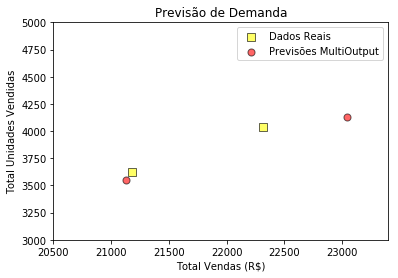

In [15]:
# Plotando

plt.figure()

plt.scatter(y_teste.iloc[:, 0].values, 
            y_teste.iloc[:, 1].values, 
            edgecolor = 'k', 
            c = "yellow", 
            s = 50, 
            marker = "s", 
            alpha = 0.6, 
            label = "Dados Reais")

plt.scatter(y_pred[:, 0], 
            y_pred[:, 1], 
            edgecolor = 'k',
            c = "red", 
            s = 50, 
            alpha = 0.6,
            label = "Previsões MultiOutput")

plt.xlim([20500, 23400])
plt.ylim([3000, 5000])

# Labels do gráfico
plt.xlabel("Total Vendas (R$)")
plt.ylabel("Total Unidades Vendidas")
plt.title("Previsão de Demanda")
plt.legend()
plt.show()

In [16]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_teste, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_teste, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_teste, y_pred)))

Mean Absolute Error: 238.9371875000004
Mean Squared Error: 138483.35305585555
Root Mean Squared Error: 372.13351509351526


In [17]:
print("\nX_Teste\n", X_teste)
print("\nY_teste\n", y_teste)
print("\nY_pred\n", y_pred)


X_Teste
 [[2008]
 [2005]]

Y_teste
    Total_Vendas  Total_Unidades_Vendidas
6     22313.054                     4034
3     21184.427                     3626

Y_pred
 [[23045.39749  4130.04   ]
 [21132.40174  3550.66   ]]
